# Daily Challenge Instructions: Your objective is to delve into the World Happiness Report dataset, which includes columns like ‘Country’, ‘Year’, ‘Happiness_Score’, ‘GDP_per_Capita’, ‘Social_Support’, ‘Healthy_Life_Expectancy’, ‘Freedom_to_Make_Life_Choices’, ‘Generosity’, and ‘Perceptions_of_Corruption’.

## Load and Inspect Data: Utilize pandas to load the World Happiness Report Dataset. Examine the data to grasp its structure and contents of the year 2019.

## Data Preprocessing: Address missing values and adjust data types as necessary.

## Social Support and Happiness: Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

## Regional Comparisons of GDP and Health: Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.

## Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.


In [11]:
# Daily Challenge
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("2019.csv")
print(df.head())

Saving 2019.csv to 2019.csv
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                   

In [36]:
#step 3: grasp the datasets structure and contents

print(df.shape)
print(df.dtypes)
print(df.head(90))
print(df.info())

(156, 9)
Overall rank                       int64
Country or region               category
Score                            float64
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
dtype: object
    Overall rank Country or region  Score  GDP per capita  Social support  \
0              1           Finland  7.769           1.340           1.587   
1              2           Denmark  7.600           1.383           1.573   
2              3            Norway  7.554           1.488           1.582   
3              4           Iceland  7.494           1.380           1.624   
4              5       Netherlands  7.488           1.396           1.522   
..           ...               ...    ...             ...             ...   
85            86        Kyrgyzstan  5.261           0.551           1

In [20]:
# Check for missing values
df.isnull().sum()

#rename columns for future processing
df['Country or region'] = df['Country or region'].astype('category')

print(df.dtypes)

Overall rank                       int64
Country or region               category
Score                            float64
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
dtype: object


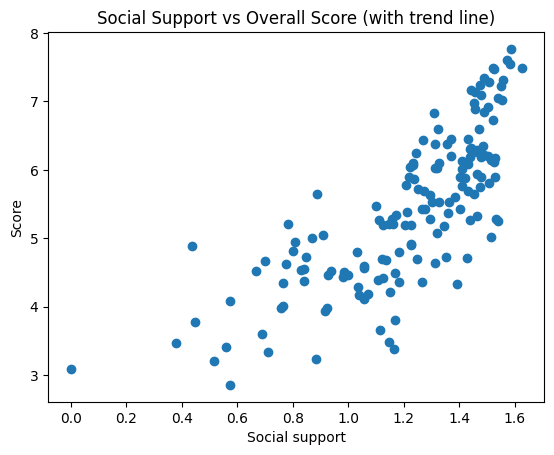

In [24]:
#Social Support and Happiness:

import matplotlib.pyplot as plt

# Sample data
x = df['Social support']
y = df['Score']

plt.scatter(x, y)
plt.xlabel("Social support")
plt.ylabel("Score")
plt.title("Social Support vs Overall Score (with trend line)")
plt.show()


/tmp/ipython-input-2982291890.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for region, data in df.groupby("Country or region"):


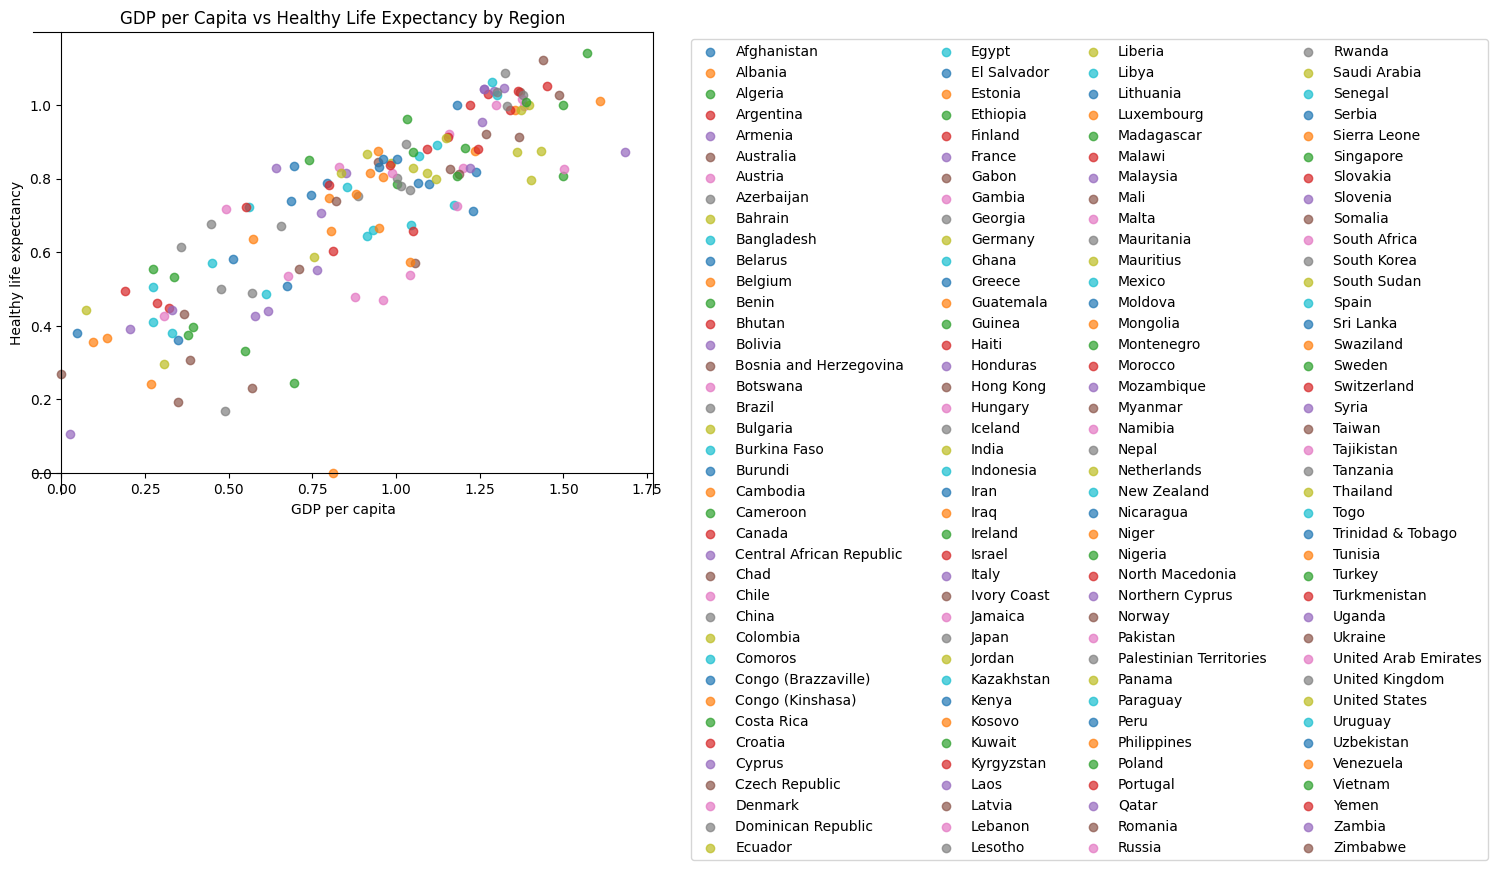

In [33]:
# Step 7 - Regional Comparisons of GDP and Health:
## Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’
## across different regions.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))

for region, data in df.groupby("Country or region"):
    ax.scatter(data["GDP per capita"],
               data["Healthy life expectancy"],
               label=region, alpha=0.7)


# Move left y-axis and bottom x-axis to intersect at (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.set_title("GDP per Capita vs Healthy Life Expectancy by Region")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Healthy life expectancy")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", ncol=4)

plt.show()
##Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’
##on the same axes to observe how economic strength relates to health outcomes in different regions.

In [38]:
!pip -q install country_converter
import country_converter as coco

cc = coco.CountryConverter()

# Convert to continent names
df["Region"] = cc.convert(names=df["Country or region"], to="continent")

# Check if any didn't map
print(df[df["Region"] == "not found"]["Country or region"].unique())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.2 MB/s eta 0:00:00
[], Categories (156, object): ['Afghanistan', 'Albania', 'Algeria', 'Argentina', ..., 'Vietnam', 'Yemen',
                           'Zambia', 'Zimbabwe']


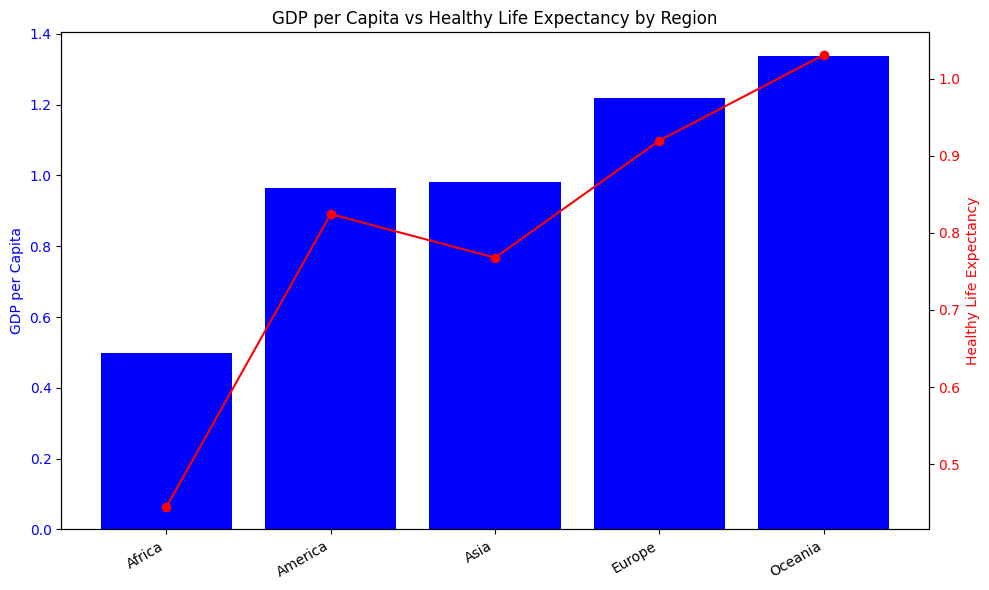

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Group by Region and take the mean of GDP + Health
regional_stats = df.groupby("Region")[["GDP per capita", "Healthy life expectancy"]].mean().reset_index()

# X positions for regions
x = np.arange(len(regional_stats))

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(x, regional_stats["GDP per capita"], color="blue", label="GDP per Capita")
ax1.set_ylabel("GDP per Capita", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax2 = ax1.twinx()
ax2.plot(x, regional_stats["Healthy life expectancy"], color="red", marker="o", label="Healthy Life Expectancy")
ax2.set_ylabel("Healthy Life Expectancy", color="red")
ax2.tick_params(axis="y", labelcolor="red")

ax1.set_xticks(x)
ax1.set_xticklabels(regional_stats["Region"], rotation=30, ha="right")

plt.title("GDP per Capita vs Healthy Life Expectancy by Region")
plt.tight_layout()
plt.show()
